# `线性回归`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

# `1)单变量线性回归`

In [3]:
data = np.loadtxt('data.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

# `1.1)损失函数`

In [3]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    
    h = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    
    return J

In [4]:
computeCost(X,y)

32.072733877455676

# `1.2)梯度下降`

In [5]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        J_history[iter] = computeCost(X, y, theta)
        
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
    
    return(theta, J_history)

array([[-3.63029144],
       [ 1.16636235]])

array([32.07273388,  6.73719046,  5.93159357, ...,  4.4834581 ,
        4.48343473,  4.48341145])

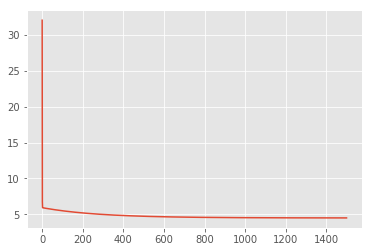

In [6]:
theta, Cost_J = gradientDescent(X, y)
display(theta, Cost_J)
# 画出每一次迭代和损失函数变化
plt.style.use('ggplot')
plt.plot(Cost_J)

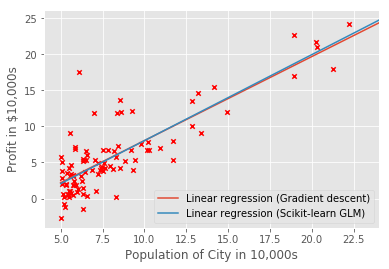

In [7]:
plt.style.use('ggplot')
plt.scatter(X[:,1], y, s=20, c='r', marker='x', linewidths=1)

# 画出线性回归梯度下降得出的函数
xx = np.arange(5, 25)
yy = theta[0] + theta[1] * xx
plt.plot(xx, yy, label='Linear regression (Gradient descent)')

# 和scikit-learn中的线性回归对比一下
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

# `2)多变量线性回归`

In [8]:
data2 = pd.read_csv('Advertising.csv', index_col=0)
print(data2.head())
print(data2.tail())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
        TV  radio  newspaper  sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4


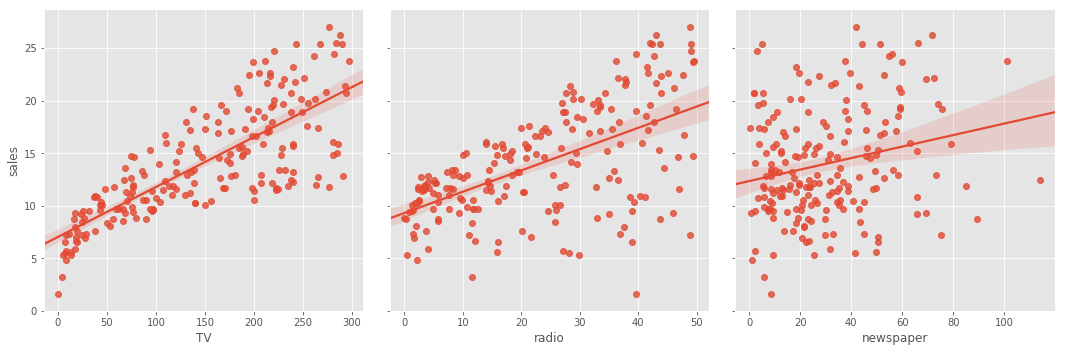

In [9]:
features_cols = ['TV','radio','newspaper']
response_cols = ['sales']
sns.pairplot(data2, x_vars=features_cols, y_vars=response_cols, size=5, kind='reg')

In [10]:
# 构造训练集和测试集
X2 = data2[features_cols]
y2 = data2[response_cols]
train_x, test_x, train_y, test_y = train_test_split(X2, y2, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

# 求解参数
regr.fit(train_x, train_y)
display(regr.intercept_, regr.coef_)

# 预测
pred_y = regr.predict(test_x)

# 均方误差MSE
metrics.mean_squared_error(test_y, pred_y)

(150, 3) (50, 3) (150, 1) (50, 1)


array([2.87696662])

array([[0.04656457, 0.17915812, 0.00345046]])

1.9730456202283384

## *`特征选择`*

*`移除与sales线性关系较弱的newspaper特征`*

In [11]:
# 构造训练集与测试集
feature_cols = ['TV', 'radio']
X3 = data2[feature_cols]
y3 = data2[response_cols]
train_x, test_x, train_y, test_y = train_test_split(X3, y3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

# 求解参数
regr.fit(train_x, train_y)
display(regr.intercept_, regr.coef_)

# 预测
pred_y = regr.predict(test_x)

# 均方误差MSE
metrics.mean_squared_error(test_y, pred_y)

(150, 2) (50, 2) (150, 1) (50, 1)


array([2.92723732])

array([[0.04660234, 0.18117959]])

1.9262760418667424